# IMDB Datasets

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [2]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=7, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/7
118/118 [==============================] - 12s 104ms/step - loss: 0.5789 - acc: 0.6908 - val_loss: 0.3884 - val_acc: 0.8715
Epoch 2/7
118/118 [==============================] - 1s 8ms/step - loss: 0.3753 - acc: 0.8576 - val_loss: 0.2935 - val_acc: 0.8874
Epoch 3/7
118/118 [==============================] - 1s 8ms/step - loss: 0.2809 - acc: 0.9023 - val_loss: 0.2792 - val_acc: 0.8850
Epoch 4/7
118/118 [==============================] - 1s 8ms/step - loss: 0.2253 - acc: 0.9203 - val_loss: 0.2797 - val_acc: 0.8870
Epoch 5/7
118/118 [==============================] - 1s 11ms/step - loss: 0.1932 - acc: 0.9339 - val_loss: 0.3022 - val_acc: 0.8870
Epoch 6/7
118/118 [==============================] - 1s 10ms/step - loss: 0.1574 - acc: 0.9471 - val_loss: 0.3308 - val_acc: 0.8869
Epoch 7/7
118/118 [==============================] - 1s 8ms/step - loss: 0.1348 - acc: 0.9543 - val_loss: 0.3701 - val_acc: 0.8829


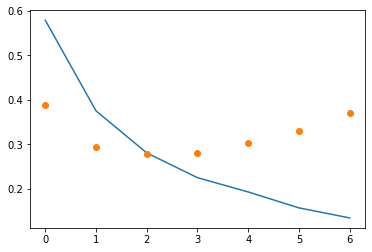

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3930 - acc: 0.8751


# IMDB Classification using simple RNN

In [7]:
from keras.preprocessing import sequence

max_words=10000 
(X_train_rnn, y_train_rnn), (X_test_rnn, y_test_rnn) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train_rnn = sequence.pad_sequences(X_train_rnn, maxlen=maxlen)
X_test_rnn = sequence.pad_sequences(X_test_rnn, maxlen=maxlen)

In [8]:
X_train_rnn[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [9]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정
rnn.add(layers.Dropout(0.5))
rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dropout(0.5))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [10]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          1568      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 163,681
Trainable params: 163,681
Non-trainable params: 0
________________________________________________

In [11]:
history=rnn.fit(X_train_rnn, y_train_rnn, epochs=7, batch_size=128, validation_split=0.2)

Epoch 1/7
157/157 [==============================] - 5s 34ms/step - loss: 0.6391 - acc: 0.6270 - val_loss: 0.7300 - val_acc: 0.6202
Epoch 2/7
157/157 [==============================] - 5s 33ms/step - loss: 0.4140 - acc: 0.8255 - val_loss: 0.4074 - val_acc: 0.8188
Epoch 3/7
157/157 [==============================] - 5s 31ms/step - loss: 0.3155 - acc: 0.8791 - val_loss: 0.4579 - val_acc: 0.8270
Epoch 4/7
157/157 [==============================] - 5s 33ms/step - loss: 0.2608 - acc: 0.9044 - val_loss: 0.4151 - val_acc: 0.8418
Epoch 5/7
157/157 [==============================] - 5s 29ms/step - loss: 0.2126 - acc: 0.9248 - val_loss: 0.4057 - val_acc: 0.8304
Epoch 6/7
157/157 [==============================] - 5s 32ms/step - loss: 0.1826 - acc: 0.9355 - val_loss: 0.6373 - val_acc: 0.7822
Epoch 7/7
157/157 [==============================] - 5s 34ms/step - loss: 0.1208 - acc: 0.9613 - val_loss: 0.5636 - val_acc: 0.8136


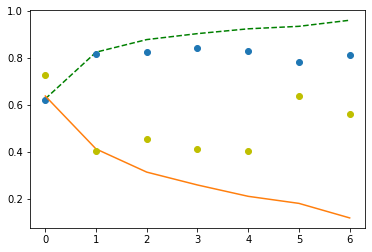

In [12]:
loss=history.history['loss']
val=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']
plt.plot(acc,'--', color='g')
plt.plot(val_acc,'o')
plt.plot(loss)
plt.plot(val,'o',color='y')

In [14]:
rnn_test_loss, rnn_test_acc = rnn.evaluate(X_test_rnn,y_test_rnn)

782/782 [==============================] - 4s 5ms/step - loss: 0.5720 - acc: 0.8145


### MLP를 통해 얻은 loss = 0.393, acc = 0.875이고, RNN을 통해 얻은 loss = 0.572, acc = 0.815으로 MLP을 통해 얻은 정확도 보다 더 낮고 손실률은 크다. 어떤 데이터가 RNN 활용에 적합한지 궁금하다.